<a href="https://colab.research.google.com/github/x200706/AIML/blob/main/ML/Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.0 MB/s eta 0:00:00


In [3]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

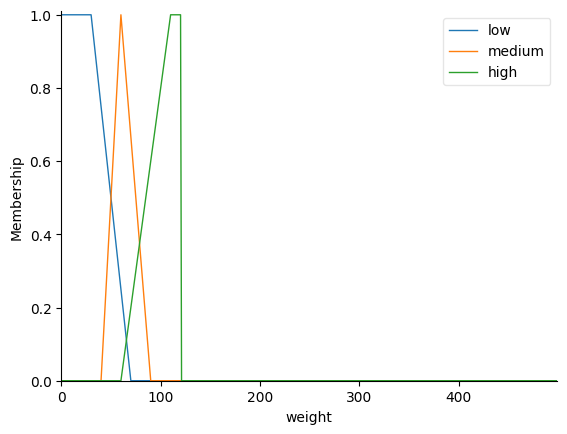

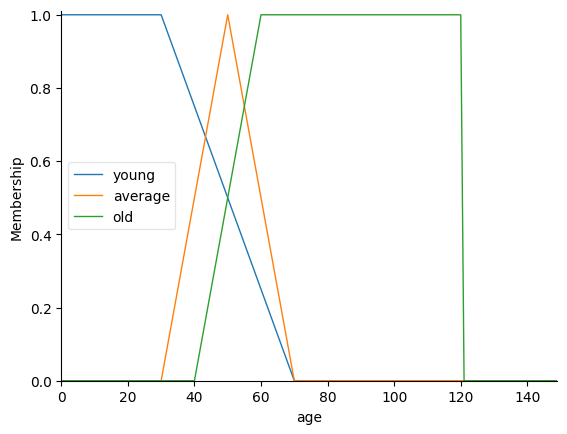

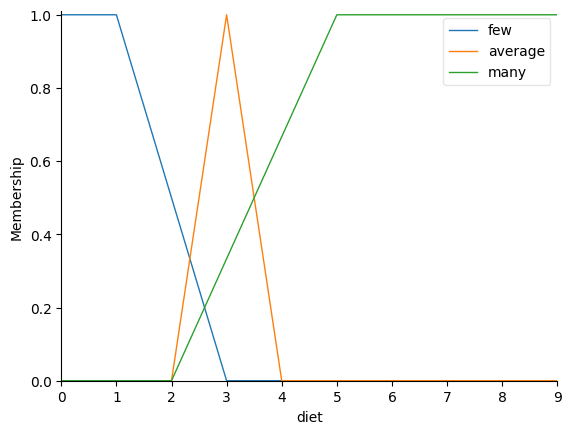

In [4]:
weight = ctrl.Antecedent(np.arange(0, 500, 1), 'weight')
age = ctrl.Antecedent(np.arange(0, 150, 1), 'age')
diet = ctrl.Consequent(np.arange(0, 10, 1), 'diet')

# 這是自動生成membership function
# weight.automf(3)
# age.automf(3)
# diet.automf(3)

# 這是手工生成
# input的membership func
weight['low']=fuzz.trapmf(weight.universe,[0,0,30,70])
weight['medium']=fuzz.trimf(weight.universe,[40,60,90])
weight['high']=fuzz.trapmf(weight.universe,[60,110,120,120])
age['young']=fuzz.trapmf(age.universe,[0,0,30,70])
age['average']=fuzz.trimf(age.universe,[30,50,70])
age['old']=fuzz.trapmf(age.universe,[40,60,120,120])
# output的membership func
diet['few']=fuzz.trapmf(diet.universe,[0,0,1,3])
diet['average']=fuzz.trimf(diet.universe,[2,3,4])
diet['many']=fuzz.trapmf(diet.universe,[2,5,10,10])

# 看看畫出來的圖
weight.view()
age.view()
diet.view()

https://scikit-fuzzy.readthedocs.io/en/latest/auto_examples/plot_tipping_problem_newapi.html

In [5]:
# 定義規則 對應自動membership func
# rule1=ctrl.Rule(age['poor'] & weight['poor'],diet['good'])
# rule2=ctrl.Rule(age['poor'] & weight['average'],diet['average'])
# rule3=ctrl.Rule(age['poor'] & weight['good'],diet['poor'])
# rule4=ctrl.Rule(age['good'] & weight['good'],diet['poor'])
# rule5=ctrl.Rule(age['good'] & weight['average'],diet['average'])
# rule6=ctrl.Rule(age['average'] & weight['good'],diet['poor'])
# rule7=ctrl.Rule(age['average'] & weight['average'],diet['average'])
# # 定義規則 對應手工membership func
rule1=ctrl.Rule(age['young'] & weight['low'],diet['many'])
rule2=ctrl.Rule(age['young'] & weight['medium'],diet['average'])
rule3=ctrl.Rule(age['young'] & weight['high'],diet['few'])
rule4=ctrl.Rule(age['old'] & weight['high'],diet['few'])
rule5=ctrl.Rule(age['old'] & weight['medium'],diet['average'])
rule6=ctrl.Rule(age['average'] & weight['high'],diet['few'])
rule7=ctrl.Rule(age['average'] & weight['medium'],diet['average'])

1.94975509441017


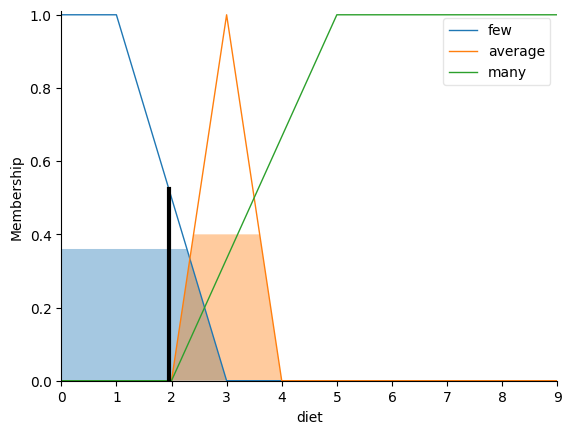

In [6]:
#defuzzy
diet_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7])
dietting=ctrl.ControlSystemSimulation(diet_ctrl)
#input value
dietting.input['weight']=78
dietting.input['age']=50
dietting.compute()
print(dietting.output['diet'])
diet.view(sim=dietting)

https://github.com/scikit-fuzzy/scikit-fuzzy/issues/208

In [11]:
defuzzy_output_list = []
# 有沒包含到rule的就會無法運算 所以要判斷有無符合規則 不符合打個0或X
for i in range(0, 120 + 1):
  for j in range(0, 120 + 1):
    dietting.input['weight'] = i
    dietting.input['age'] = j
    output_diet = 0
    # 唉呀！Deepseek你是天才啊！你想到這種大道至簡的方法，真的好愛你...
    try:
        # 嘗試計算輸出
        dietting.compute()
        output_diet = dietting.output['diet']
    except:
        # 如果計算失敗（例如沒有匹配的規則），則將輸出設為 0
        output_diet = 0
    defuzzy_output_list.append([i, j, output_diet])
print(defuzzy_output_list)

[[0, 0, np.float64(6.181818181818182)], [0, 1, np.float64(6.181818181818182)], [0, 2, np.float64(6.181818181818182)], [0, 3, np.float64(6.181818181818182)], [0, 4, np.float64(6.181818181818182)], [0, 5, np.float64(6.181818181818182)], [0, 6, np.float64(6.181818181818182)], [0, 7, np.float64(6.181818181818182)], [0, 8, np.float64(6.181818181818182)], [0, 9, np.float64(6.181818181818182)], [0, 10, np.float64(6.181818181818182)], [0, 11, np.float64(6.181818181818182)], [0, 12, np.float64(6.181818181818182)], [0, 13, np.float64(6.181818181818182)], [0, 14, np.float64(6.181818181818182)], [0, 15, np.float64(6.181818181818182)], [0, 16, np.float64(6.181818181818182)], [0, 17, np.float64(6.181818181818182)], [0, 18, np.float64(6.181818181818182)], [0, 19, np.float64(6.181818181818182)], [0, 20, np.float64(6.181818181818182)], [0, 21, np.float64(6.181818181818182)], [0, 22, np.float64(6.181818181818182)], [0, 23, np.float64(6.181818181818182)], [0, 24, np.float64(6.181818181818182)], [0, 25, n

In [12]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

x_values = [item[0] for item in defuzzy_output_list]
y_values = [item[1] for item in defuzzy_output_list]
z_values = [item[2] for item in defuzzy_output_list]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(x_values, y_values, z_values)

# ax.set_xlabel('old')
# ax.set_ylabel('weight')
# ax.set_zlabel('defuzzy')

# plt.show()


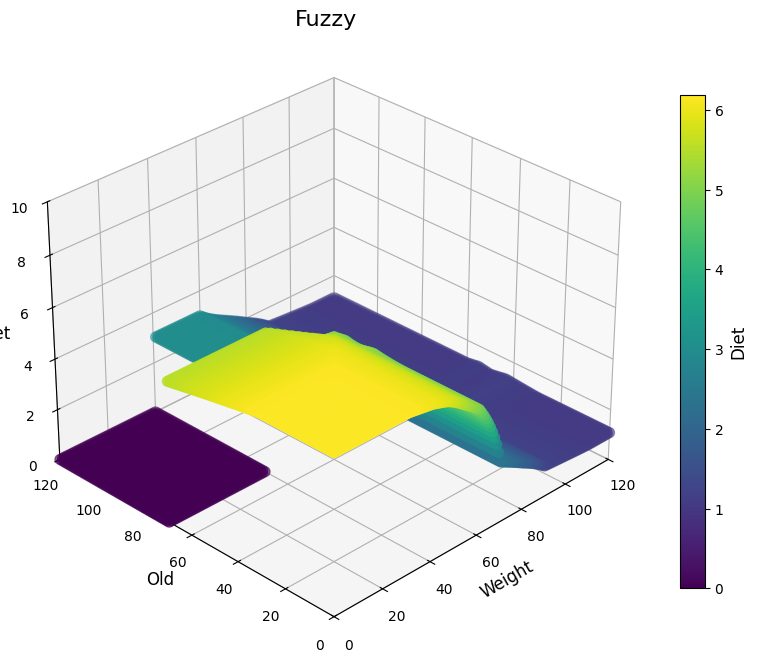

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Fuzzy', fontsize=16)

ax.set_xlabel('Weight', fontsize=12)
ax.set_ylabel('Old', fontsize=12)
ax.set_zlabel('Diet', fontsize=12)
ax.set_xlim([120, 0])
ax.set_ylim([120, 0])
ax.set_zlim([0, 10])

ax.scatter(x_values, y_values, z_values, c=z_values, cmap='viridis', marker='o', s=50)

cbar = fig.colorbar(ax.collections[0], shrink=0.8)
cbar.set_label('Diet', fontsize=12)

ax.view_init(elev=30, azim=45)

plt.show()

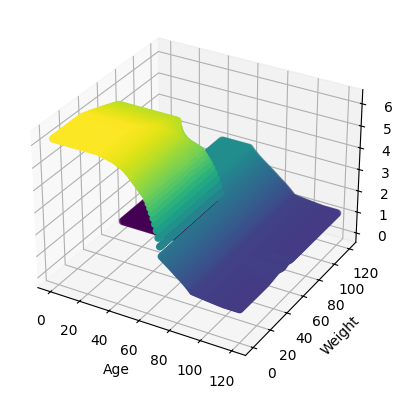

In [14]:
# 另個方向的圖
# 將結果轉換為 NumPy 陣列
defuzzy_output_array = np.array(defuzzy_output_list)

# 創建三維圖形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 提取 x, y, z 數據
x = defuzzy_output_array[:, 0]  # age
y = defuzzy_output_array[:, 1]  # weight
z = defuzzy_output_array[:, 2]  # diet

# 繪製三維散點圖
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# 設置軸標籤
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Diet')

# 顯示圖形
plt.show()